In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# Function to load and process CSV files without interpolation
def load_and_process_csvs(file_pattern):
    # Load all CSV files matching the pattern
    file_paths = glob.glob(file_pattern)

    # Initialize list to store data from each file
    data_frames = []

    # Iterate over each CSV and load data
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        data_frames.append(df)

    # Find the common set of steps across all files
    common_steps = set(data_frames[0]['Step'].values)
    for df in data_frames[1:]:
        common_steps = common_steps.intersection(set(df['Step'].values))

    # Convert the common_steps back to a sorted list
    common_steps = sorted(list(common_steps))

    # Filter the data for only the common steps
    filtered_values = []
    for df in data_frames:
        df_filtered = df[df['Step'].isin(common_steps)]
        filtered_values.append(df_filtered['Value'].values)

    # Convert the list of filtered values into a NumPy array
    filtered_values = np.array(filtered_values)

    # Calculate the mean and standard deviation across the seeds
    mean_values = np.mean(filtered_values, axis=0)
    std_dev_values = np.std(filtered_values, axis=0)

    return common_steps, mean_values, std_dev_values

# Function to plot PPO and CPO results with confidence intervals
def plot_ppo_vs_cpo(ppo_file_pattern, cpo_file_pattern, title):
    # Load and process the CSV files for PPO and CPO without interpolation
    ppo_steps, ppo_mean, ppo_std_dev = load_and_process_csvs(ppo_file_pattern)
    cpo_steps, cpo_mean, cpo_std_dev = load_and_process_csvs(cpo_file_pattern)

    # Plot both PPO and CPO mean values with confidence intervals
    plt.figure(figsize=(10, 6))

    # Plot PPO results
    plt.plot(ppo_steps, ppo_mean, color='blue', label='PPO (Average of 20 Seeds)')
    plt.fill_between(ppo_steps,
                     ppo_mean - ppo_std_dev,
                     ppo_mean + ppo_std_dev,
                     color='blue', alpha=0.3, label='PPO Confidence Interval')

    # Plot CPO results
    plt.plot(cpo_steps, cpo_mean, color='green', label='CPO (Average of 20 Seeds)')
    plt.fill_between(cpo_steps,
                     cpo_mean - cpo_std_dev,
                     cpo_mean + cpo_std_dev,
                     color='green', alpha=0.3, label='CPO Confidence Interval')

    # Add labels and title
    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.title(title)

    # Add legend
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.show()

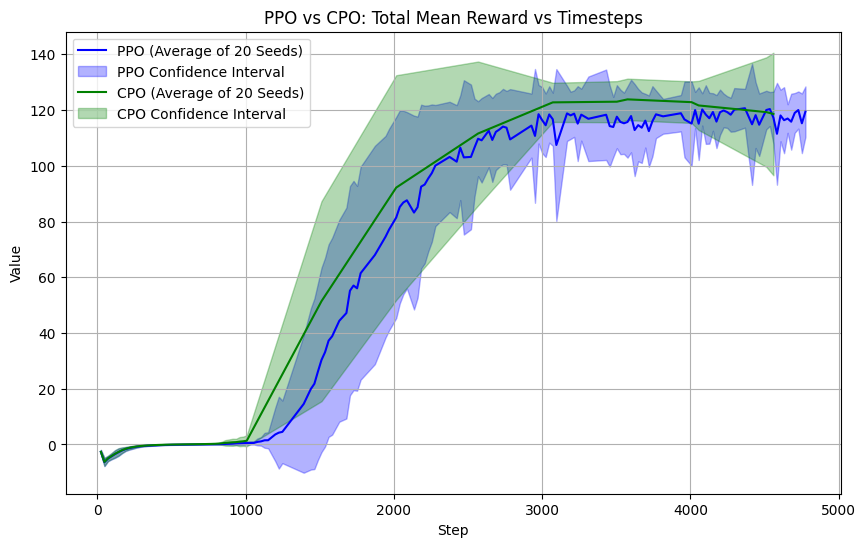

In [3]:
plot_ppo_vs_cpo("./ppo-total_reward_mean/skrl_quadcopter_direct_ppo-log-*.csv", 
                "./cpo-total_reward_mean/skrl_quadcopter_direct_cpo-log-*.csv",
                "PPO vs CPO: Total Mean Reward vs Timesteps")

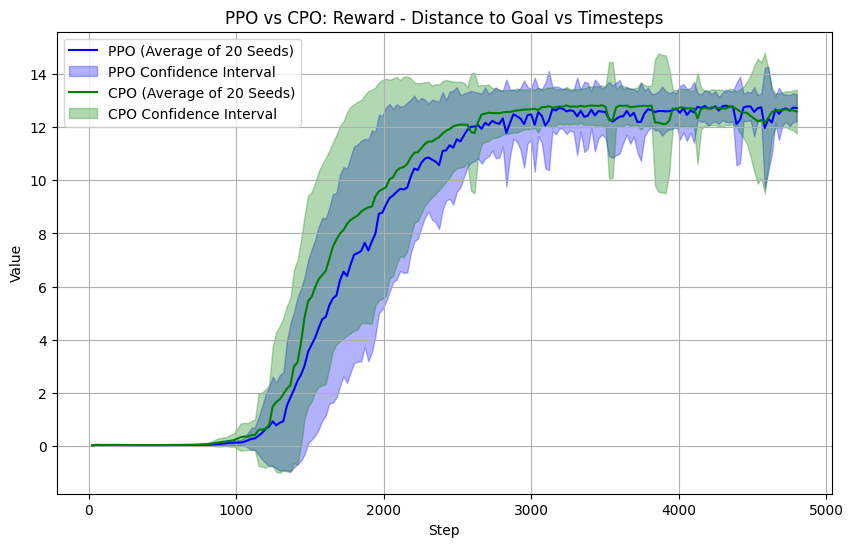

In [4]:
plot_ppo_vs_cpo("./ppo-reward-distance_to_goal/skrl_quadcopter_direct_ppo-log-*.csv", 
                "./cpo-reward-distance_to_goal/skrl_quadcopter_direct_cpo-log-*.csv",
                "PPO vs CPO: Reward - Distance to Goal vs Timesteps")

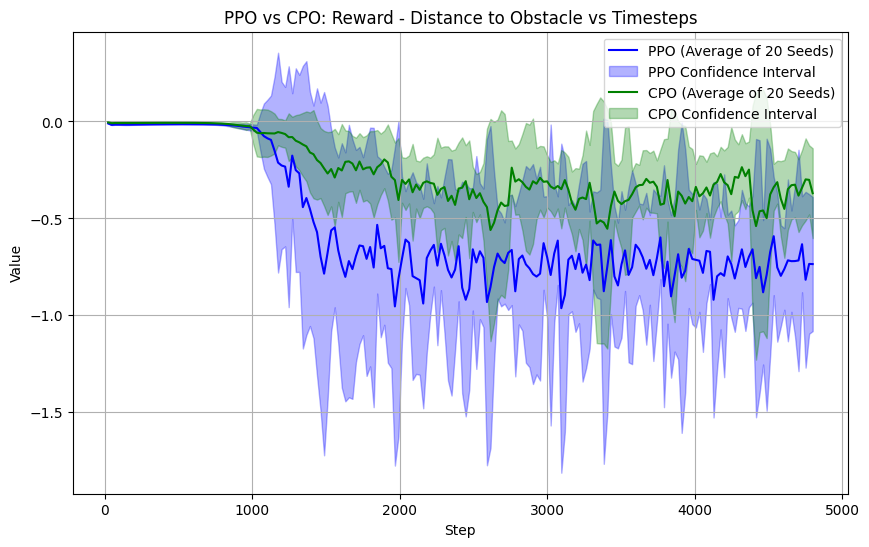

In [5]:
plot_ppo_vs_cpo("./ppo-reward-distance_to_obstacle/skrl_quadcopter_direct_ppo-log-*.csv", 
                "./cpo-reward-distance_to_obstacle/skrl_quadcopter_direct_cpo-log-*.csv",
                "PPO vs CPO: Reward - Distance to Obstacle vs Timesteps")

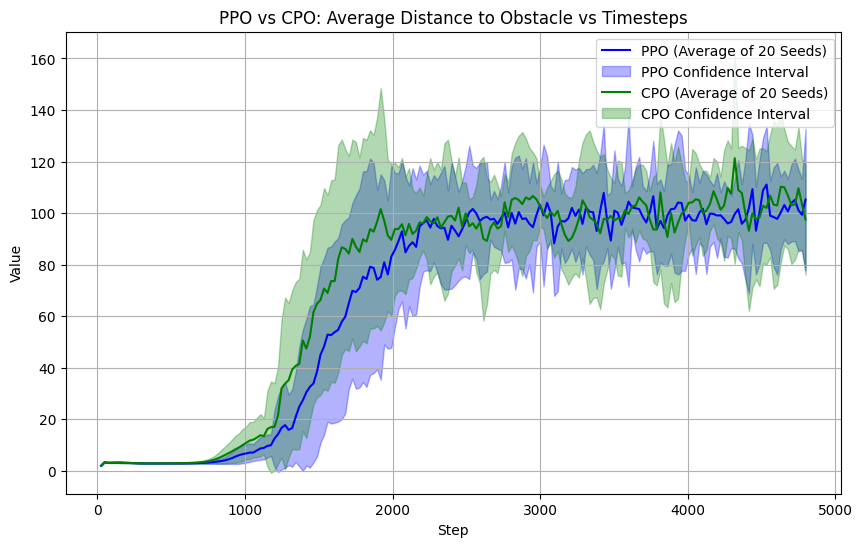

In [6]:
plot_ppo_vs_cpo("./ppo-distance_to_obstacle_raw/skrl_quadcopter_direct_ppo-log-*.csv", 
                "./cpo-distance_to_obstacle_raw/skrl_quadcopter_direct_cpo-log-*.csv",
                "PPO vs CPO: Average Distance to Obstacle vs Timesteps")

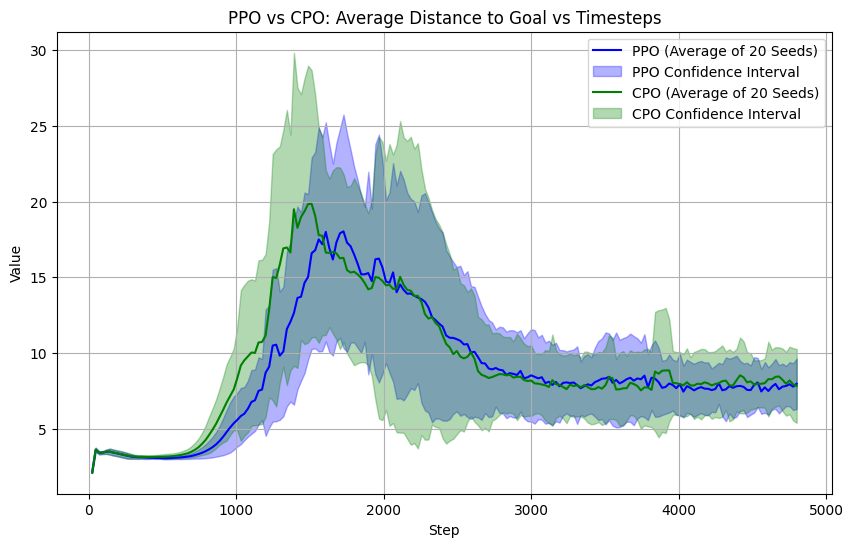

In [7]:
plot_ppo_vs_cpo("./ppo-distance_to_goal_raw/skrl_quadcopter_direct_ppo-log-*.csv", 
                "./cpo-distance_to_goal_raw/skrl_quadcopter_direct_cpo-log-*.csv",
                "PPO vs CPO: Average Distance to Goal vs Timesteps")